In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,8)
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [60]:
df1 = pd.read_csv("Loan Prediction.csv")

df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df1.shape

(614, 13)

In [62]:
df1 = df1.drop(['Loan_ID'], axis = 'columns')

In [63]:
df=df1
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
def show_stats(df,column):
    print(column.value_counts(dropna=False),end='\n\n')     
    for x in column.unique():
        count = len(df[column == x])
        if count==0:
            count = len(df[column.isnull()])
        print("Percentage of {} : {:.2f}%".format(x,(count / (len(column))*100)))
    sns.set(font_scale = 1.5)
    sns.countplot(x=column, data=df, palette="hls")
    plt.show()

### Gender

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

Percentage of Male : 79.64%
Percentage of Female : 18.24%
Percentage of nan : 2.12%


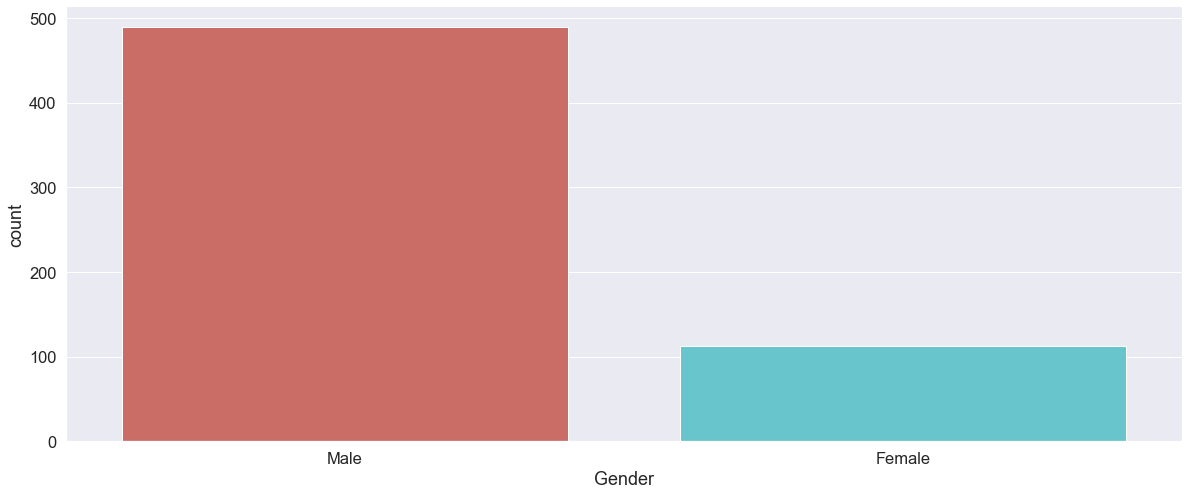

In [66]:
show_stats(df1,df1.Gender)

### Married

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

Percentage of No : 34.69%
Percentage of Yes : 64.82%
Percentage of nan : 0.49%


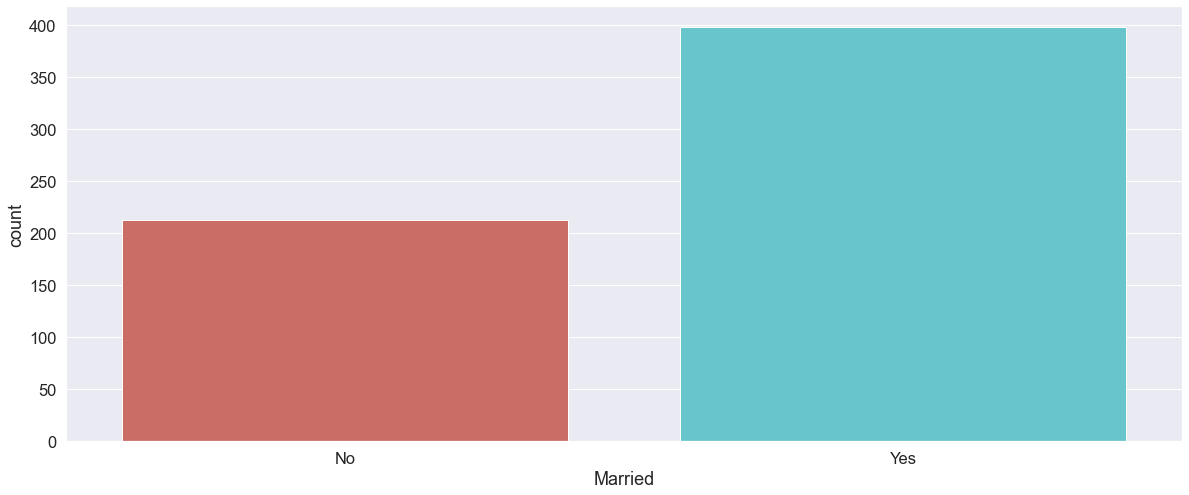

In [67]:
show_stats(df1,df1.Married)

### Education

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Percentage of Graduate : 78.18%
Percentage of Not Graduate : 21.82%


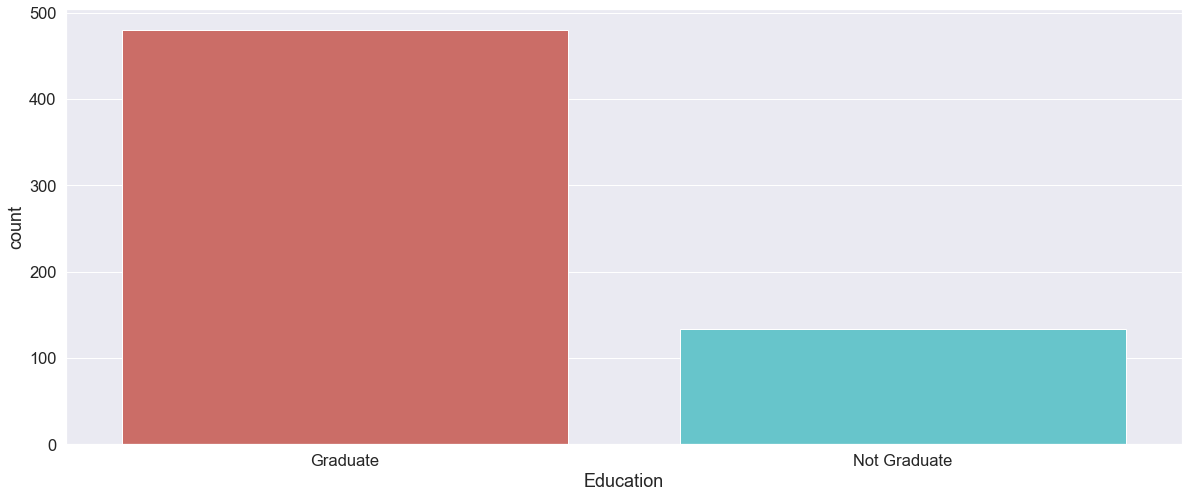

In [68]:
show_stats(df1,df1.Education)

### Self Employed 

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

Percentage of No : 81.43%
Percentage of Yes : 13.36%
Percentage of nan : 5.21%


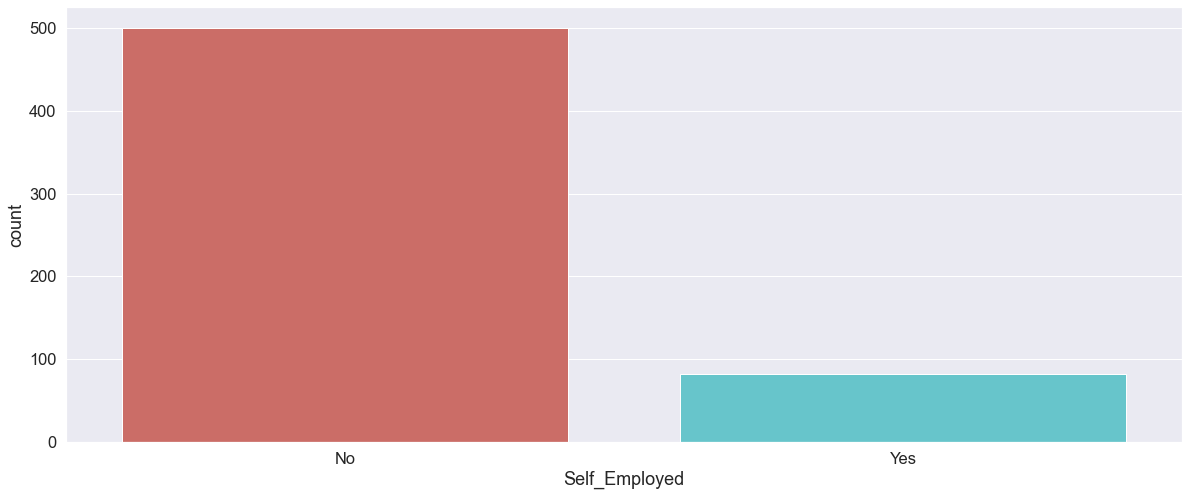

In [69]:
show_stats(df1,df1.Self_Employed)

### Credit History 

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

Percentage of 1.0 : 77.36%
Percentage of 0.0 : 14.50%
Percentage of nan : 8.14%


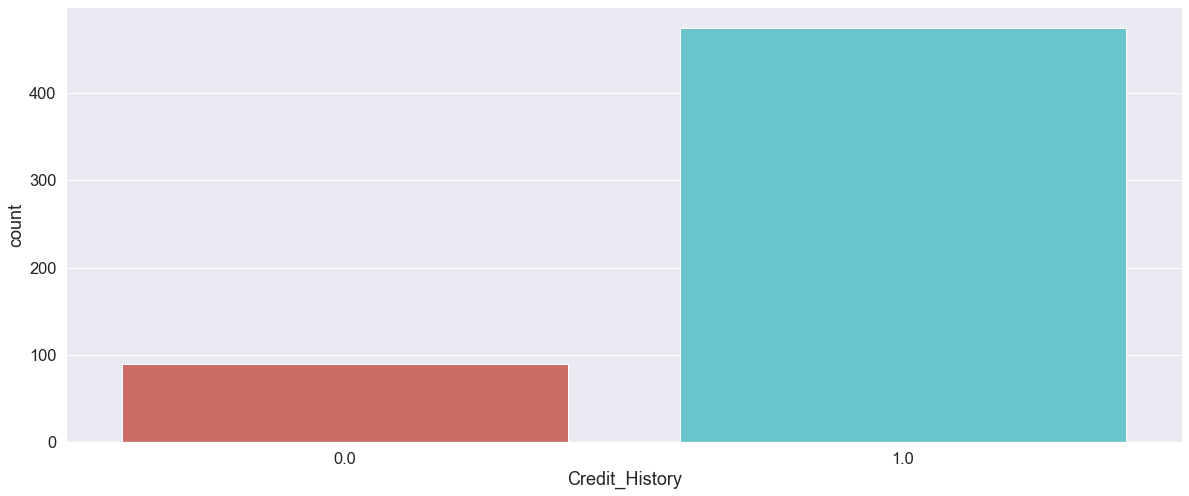

In [70]:
show_stats(df1,df1.Credit_History)

### Property Area

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Percentage of Urban : 32.90%
Percentage of Rural : 29.15%
Percentage of Semiurban : 37.95%


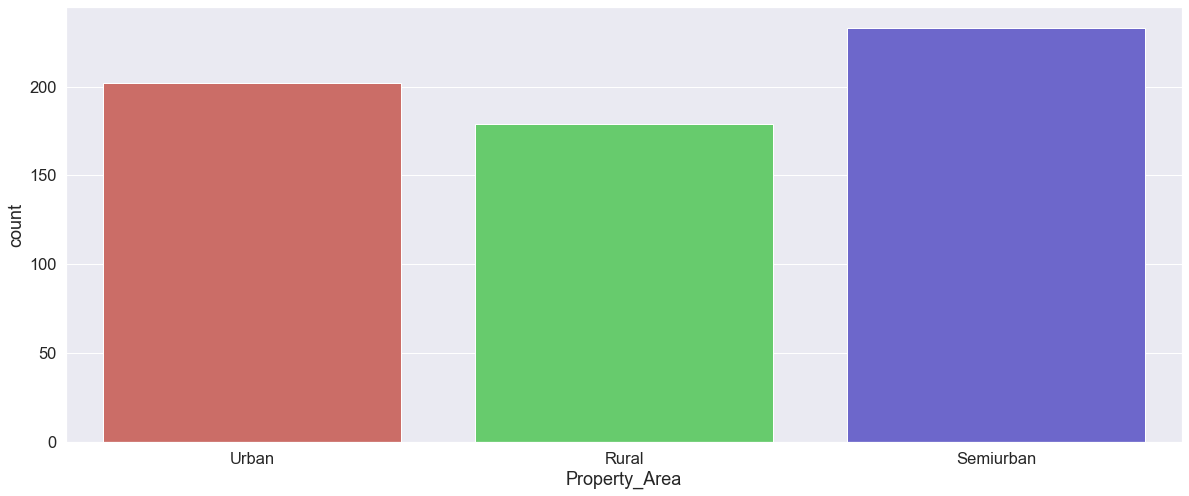

In [71]:
show_stats(df1,df1.Property_Area)

### Loan Status 

Y    422
N    192
Name: Loan_Status, dtype: int64

Percentage of Y : 68.73%
Percentage of N : 31.27%


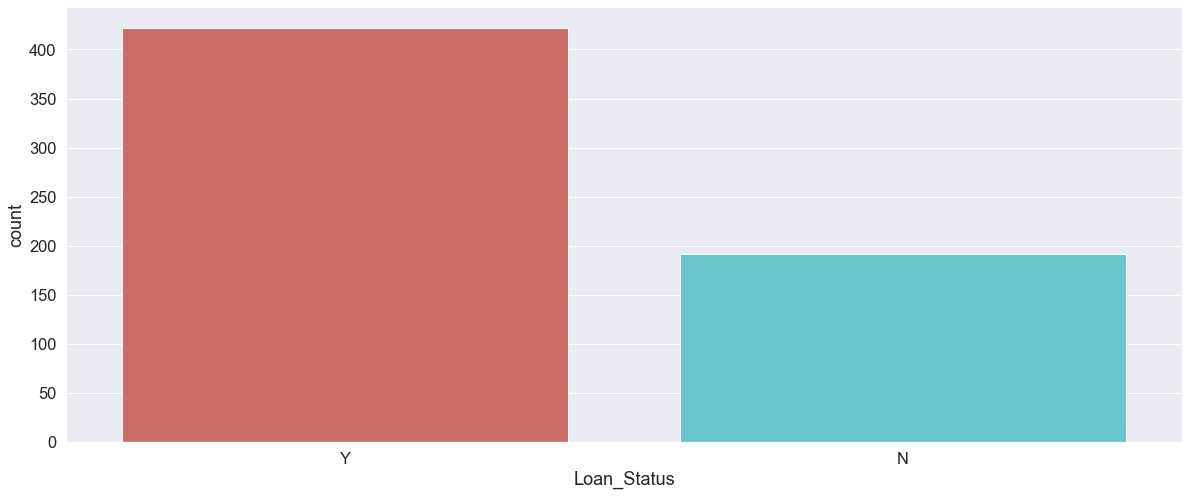

In [72]:
show_stats(df1,df1.Loan_Status)

### Loan Amount Term 

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Percentage of 360.0 : 83.39%
Percentage of 120.0 : 0.49%
Percentage of 240.0 : 0.65%
Percentage of nan : 2.28%
Percentage of 180.0 : 7.17%
Percentage of 60.0 : 0.33%
Percentage of 300.0 : 2.12%
Percentage of 480.0 : 2.44%
Percentage of 36.0 : 0.33%
Percentage of 84.0 : 0.65%
Percentage of 12.0 : 0.16%


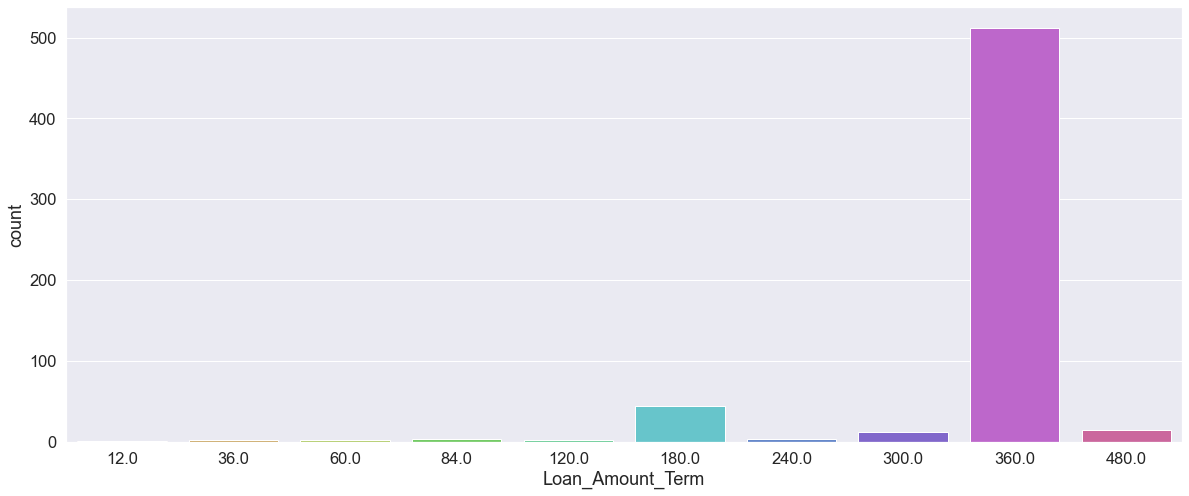

In [73]:
show_stats(df1,df1.Loan_Amount_Term)

### Dependents 

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

Percentage of 0 : 56.19%
Percentage of 1 : 16.61%
Percentage of 2 : 16.45%
Percentage of 3+ : 8.31%
Percentage of nan : 2.44%


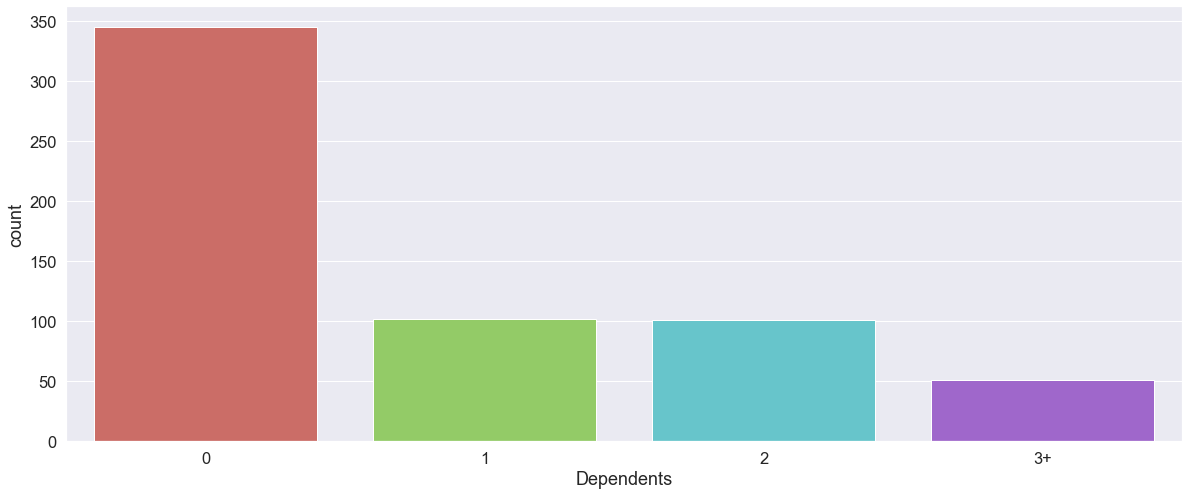

In [74]:
show_stats(df1,df1.Dependents)

In [75]:
df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### Numerical Variable

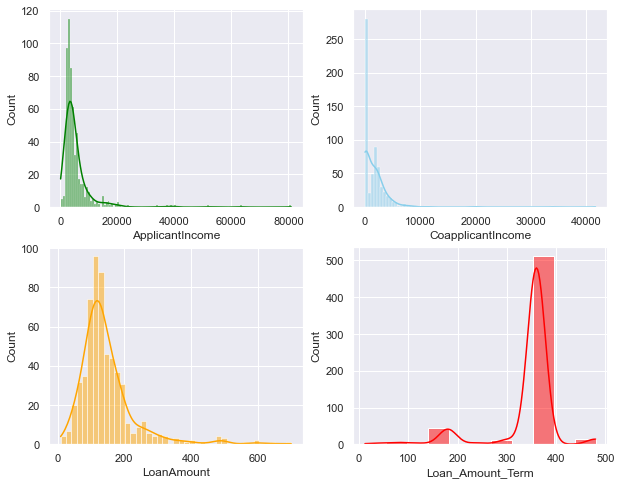

In [76]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df1, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df1, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df1, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=df1, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red');

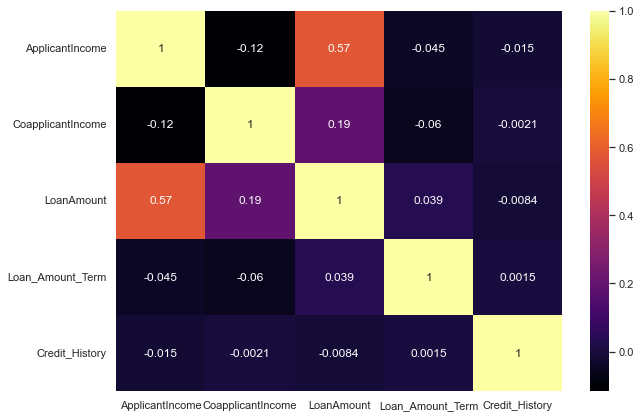

In [77]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True, cmap='inferno');

# Preprocessing and Model Building after train/test split 

### Data Imputation

In [78]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0],inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0],inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0],inplace=True)

In [79]:
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace=True)

### One-hot Encoding

In [80]:
df1 = pd.get_dummies(df1)

# Drop columns
df1 = df1.drop(['Gender_Female', 'Married_No',
 'Dependents_0', 'Education_Not Graduate', 
              'Self_Employed_No','Loan_Status_N',
 'Property_Area_Rural'], axis = 1)


### Remove Outliers  

In [81]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

### Skewed Distribution Treatment

In [82]:
df1.ApplicantIncome = np.sqrt(df1.ApplicantIncome)
df1.CoapplicantIncome = np.sqrt(df1.CoapplicantIncome)
df1.LoanAmount = np.sqrt(df1.LoanAmount)

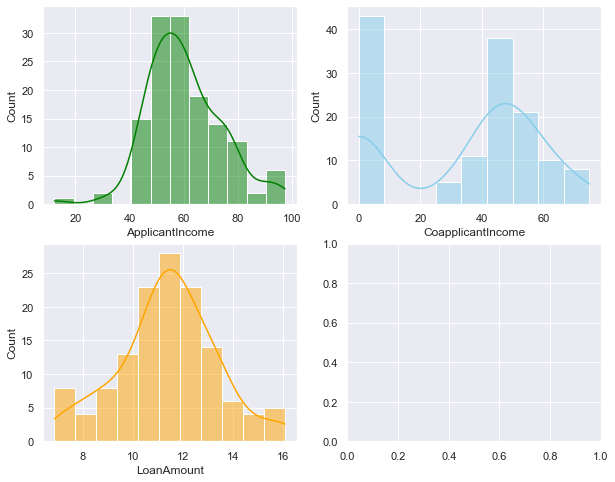

In [83]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df1, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df1, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df1, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

### Smote oversampling technique

In [84]:
X = df1.drop(["Loan_Status_Y"], axis=1)
y = df1["Loan_Status_Y"]

In [85]:
X, y = SMOTE().fit_resample(X, y)

In [86]:
y

0      1
1      1
2      0
3      1
4      1
      ..
219    0
220    0
221    0
222    0
223    0
Name: Loan_Status_Y, Length: 224, dtype: uint8

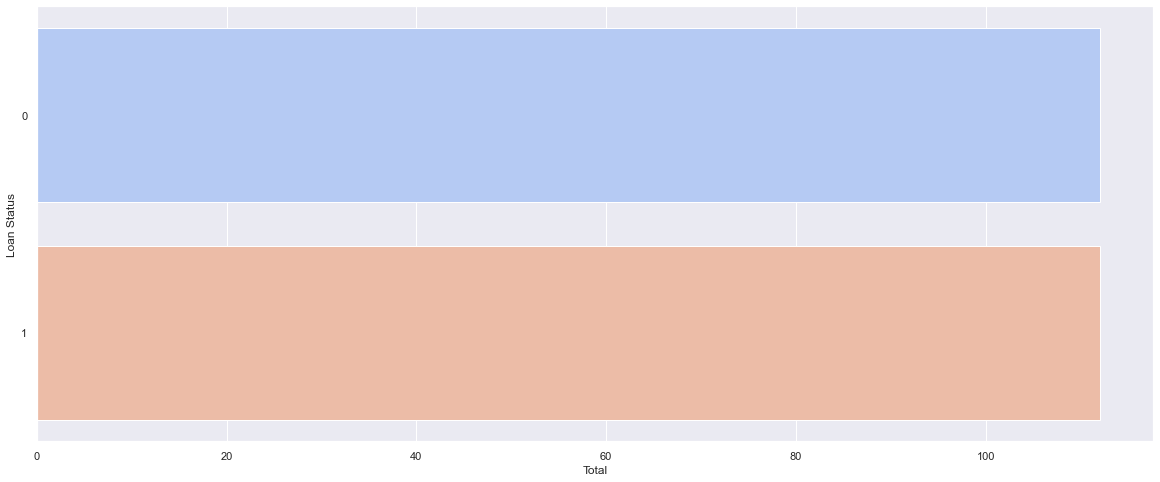

In [87]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df1, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

### Data Normalization 

In [88]:
X = MinMaxScaler().fit_transform(X)

### Splitting Data Set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model Building

### Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.89      0.77      0.83        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

LR accuracy: 84.44%
LR recall: 77.27%


Text(156.5, 0.5, 'Truth')

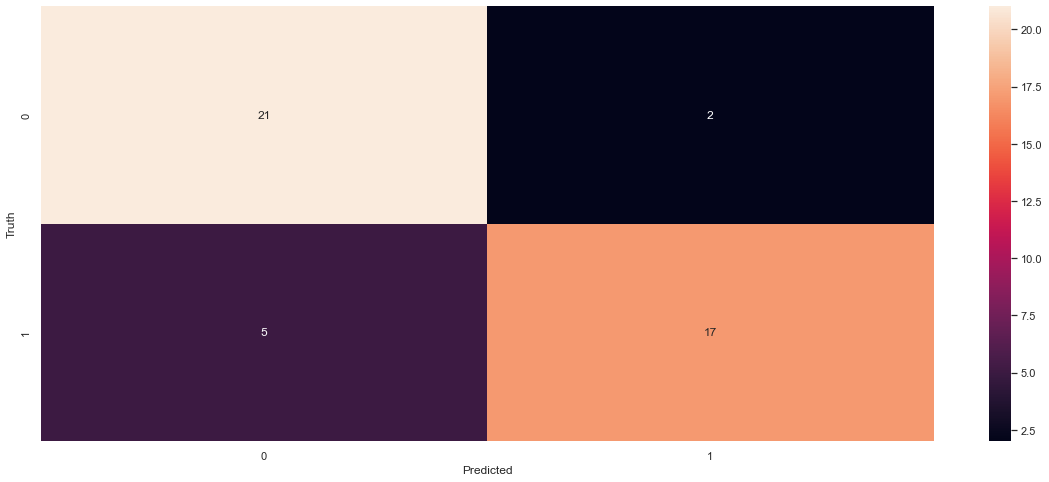

In [90]:
LRclassifier = LogisticRegression(solver='newton-cg', max_iter=300, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

from sklearn.metrics import recall_score
LRRec=recall_score(y_test, y_pred, average='binary')

print('LR accuracy: {:.2f}%'.format(LRAcc*100))
print('LR recall: {:.2f}%'.format(LRRec*100))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

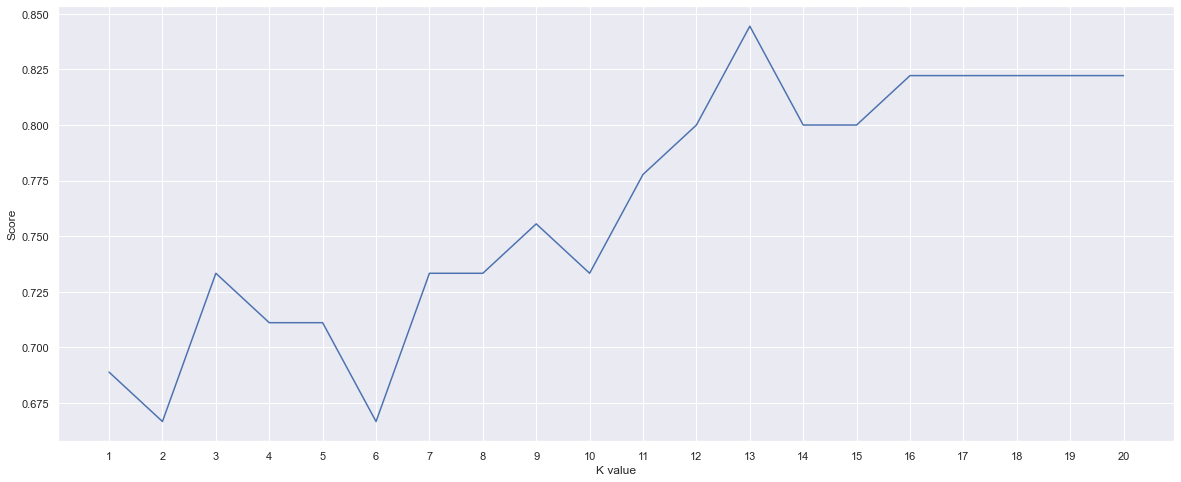

KNN best accuracy: 84.44%


In [91]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [92]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.probability=True
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.73      0.73      0.73        22

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45

[[17  6]
 [ 6 16]]
SVC accuracy: 73.33%


In [93]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68        23
           1       0.67      0.82      0.73        22

    accuracy                           0.71        45
   macro avg       0.72      0.71      0.71        45
weighted avg       0.72      0.71      0.71        45

[[14  9]
 [ 4 18]]
Categorical Naive Bayes accuracy: 71.11%


In [94]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.79      0.68      0.73        22

    accuracy                           0.76        45
   macro avg       0.76      0.75      0.75        45
weighted avg       0.76      0.76      0.75        45

[[19  4]
 [ 7 15]]
Gaussian Naive Bayes accuracy: 75.56%


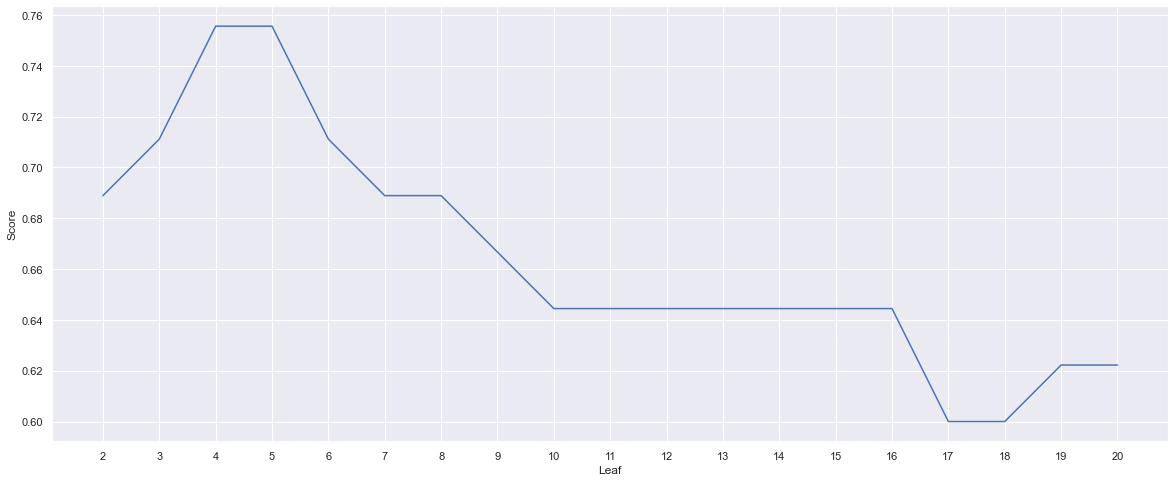

Decision Tree Accuracy: 75.56%


In [95]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [96]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.81      0.77      0.79        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

[[19  4]
 [ 5 17]]
Gradient Boosting accuracy: 80.00%


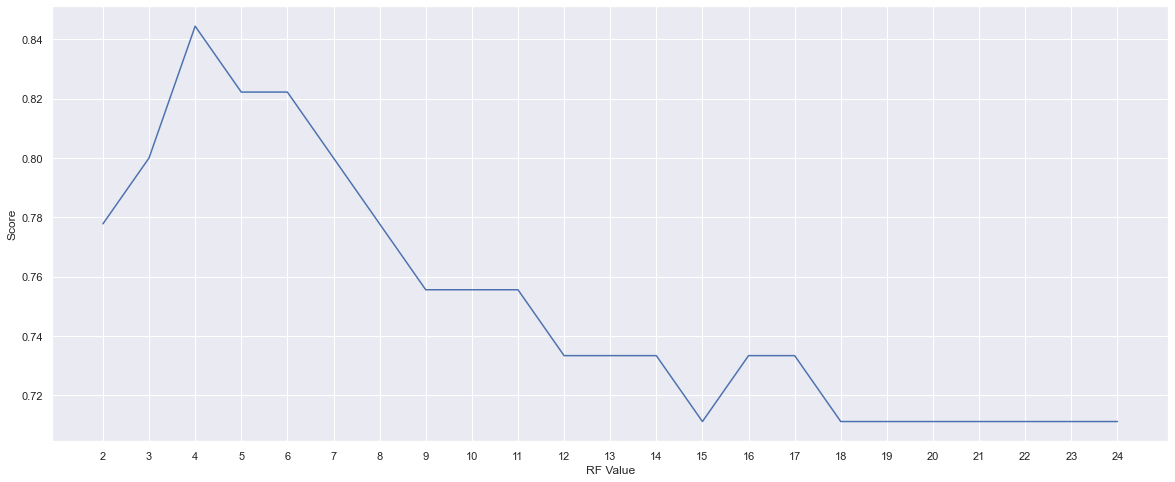

Random Forest Accuracy:  84.44%


In [97]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

### Prediction probabilities

In [98]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = LRclassifier.predict_proba(X_test)
kn_probs = KNclassifier.predict_proba(X_test)

svc_probs = SVCclassifier.predict_proba(X_test)
nb1_probs = NBclassifier1.predict_proba(X_test)
nb2_probs = NBclassifier2.predict_proba(X_test)
dt_probs = DTclassifier.predict_proba(X_test)
gb_probs = GBclassifier.predict_proba(X_test)
rf_probs = RFclassifier.predict_proba(X_test)

In [99]:
lr_probs = lr_probs[:, 1]
kn_probs = kn_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb1_probs = nb1_probs[:, 1]
nb2_probs = nb2_probs[:, 1]
dt_probs = dt_probs[:, 1]
gb_probs = gb_probs[:, 1]
rf_probs = rf_probs[:, 1]

### Computing AUROC and ROC curve values

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUROC

In [101]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb1_auc = roc_auc_score(y_test, nb1_probs)
nb2_auc = roc_auc_score(y_test, nb2_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

### Calculate ROC curve

In [102]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb1_fpr, nb1_tpr, _ = roc_curve(y_test, nb1_probs)
nb2_fpr, nb2_tpr, _ = roc_curve(y_test, nb2_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

### Plot the ROC curve

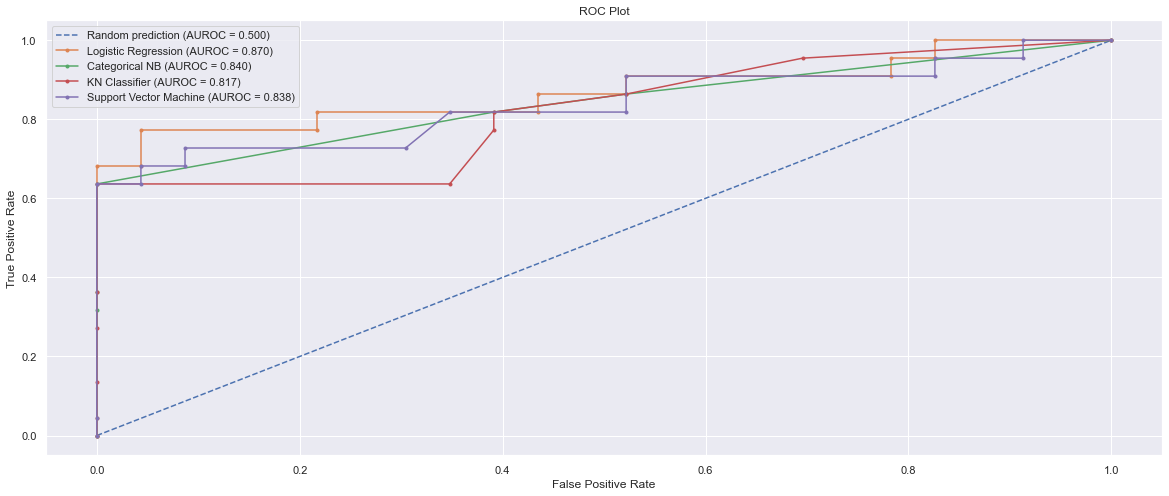

In [103]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(nb1_fpr, nb1_tpr, marker='.', label='Categorical NB (AUROC = %0.3f)' % nb1_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='KN Classifier (AUROC = %0.3f)' % kn_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svc_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

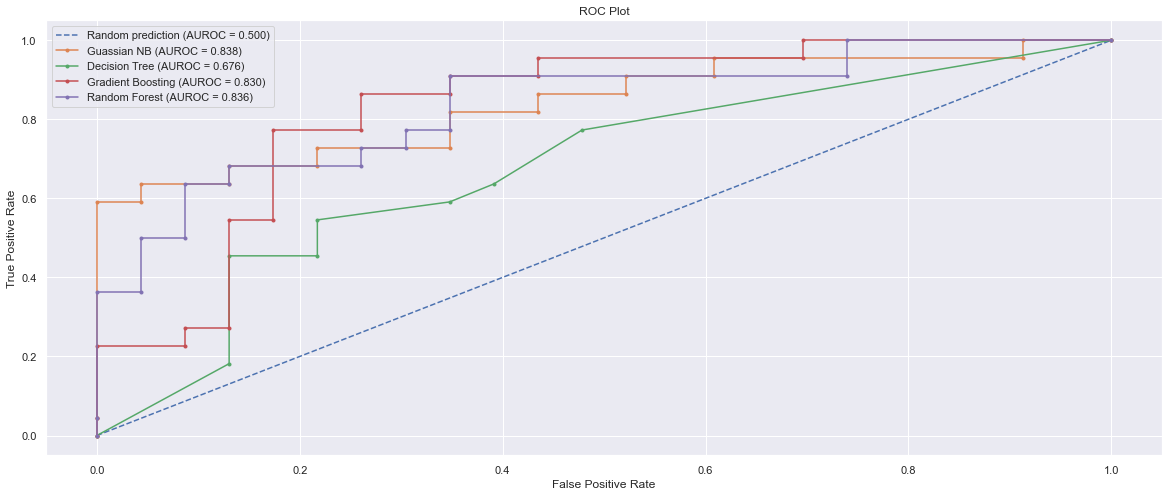

In [104]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nb2_fpr, nb2_tpr, marker='.', label='Guassian NB (AUROC = %0.3f)' % nb2_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### Model Comparison

In [105]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,84.444444
1,K Neighbors,84.444444
6,Random Forest,84.444444
7,Gradient Boost,80.000000
4,Gaussian NB,75.555556
5,Decision Tree,75.555556
2,SVM,73.333333
3,Categorical NB,71.111111


### Preprocessing and Model Building before train/test split

## Data Preprocessing

### Outliers Removal

In [106]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df2 = df[~(df > (Q3 + 1.5 * IQR)).any(axis=1)]
df2

C:\Users\MEHBOO~1\AppData\Local\Temp/ipykernel_20428/3427938943.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df[~(df > (Q3 + 1.5 * IQR)).any(axis=1)]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


###  Splitting Data Set 

In [107]:
X = df2.drop(["Loan_Status"], axis=1)
y = df2["Loan_Status"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40,stratify=y)

In [109]:
X_train['Gender'].fillna(X_train['Gender'].mode()[0],inplace=True)
X_train['Married'].fillna(X_train['Married'].mode()[0],inplace=True)
X_train['Dependents'].fillna(X_train['Dependents'].mode()[0],inplace=True)
X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0],inplace=True)
X_train['Credit_History'].fillna(X_train['Credit_History'].mode()[0],inplace=True)
X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mode()[0],inplace=True)

E:\Program Files\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [110]:
X_test['Gender'].fillna(X_test['Gender'].mode()[0],inplace=True)
X_test['Married'].fillna(X_test['Married'].mode()[0],inplace=True)
X_test['Dependents'].fillna(X_test['Dependents'].mode()[0],inplace=True)
X_test['Self_Employed'].fillna(X_test['Self_Employed'].mode()[0],inplace=True)
X_test['Credit_History'].fillna(X_test['Credit_History'].mode()[0],inplace=True)
X_test['Loan_Amount_Term'].fillna(X_test['Loan_Amount_Term'].mode()[0],inplace=True)

In [111]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [112]:
X_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [113]:
X_train['LoanAmount'].fillna(X_train['LoanAmount'].mean(),inplace=True)

In [114]:
X_test['LoanAmount'].fillna(X_test['LoanAmount'].mean(),inplace=True)

In [115]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
331,Male,No,0,Graduate,No,2935,0.0,98.000000,360.0,1.0,Semiurban
441,Male,Yes,0,Graduate,No,7901,1833.0,180.000000,360.0,1.0,Rural
490,Male,No,0,Not Graduate,No,2699,2785.0,96.000000,360.0,1.0,Semiurban
522,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.000000,360.0,1.0,Rural
384,Male,Yes,2,Graduate,No,4566,0.0,100.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
220,Male,Yes,0,Graduate,No,2221,0.0,60.000000,360.0,0.0,Urban
169,Male,Yes,2,Graduate,No,8000,0.0,200.000000,360.0,1.0,Semiurban
521,Male,No,0,Graduate,No,2500,0.0,55.000000,360.0,1.0,Semiurban
202,Male,Yes,3+,Not Graduate,No,3992,0.0,146.412162,180.0,1.0,Urban


In [116]:
X_train=pd.get_dummies(X_train)
X_train = X_train.drop(['Gender_Female', 'Married_No',
 'Dependents_0', 'Education_Not Graduate', 
              'Self_Employed_No',
 'Property_Area_Rural'], axis = 1)

y_train=pd.get_dummies(y_train)
y_train = y_train.drop(['N'], axis = 1)
y_train=y_train['Y']

In [117]:
X_test=pd.get_dummies(X_test)
X_test = X_test.drop(['Gender_Female', 'Married_No',
 'Dependents_0', 'Education_Not Graduate', 
              'Self_Employed_No',
 'Property_Area_Rural'], axis = 1)

y_test=pd.get_dummies(y_test)
y_test = y_test.drop(['N'], axis = 1)
y_test=y_test['Y']

#### Distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed. I will use square root transformation to normalize the distribution.

In [118]:
X_train.ApplicantIncome = np.sqrt(X_train.ApplicantIncome)
X_train.CoapplicantIncome = np.sqrt(X_train.CoapplicantIncome)
X_train.LoanAmount = np.sqrt(X_train.LoanAmount)

In [119]:
X_test.ApplicantIncome = np.sqrt(X_test.ApplicantIncome)
X_test.CoapplicantIncome = np.sqrt(X_test.CoapplicantIncome)
X_test.LoanAmount = np.sqrt(X_test.LoanAmount)

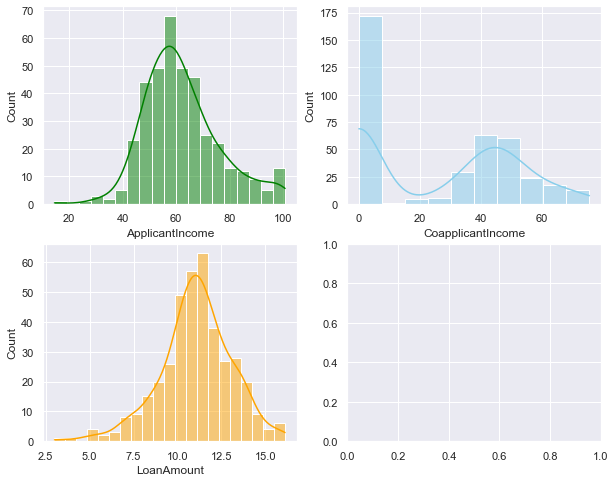

In [120]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=X_train, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=X_train, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=X_train, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


###  Smote oversampling technique 

In [121]:
X, y = SMOTE().fit_resample(X_train, y_train)

In [122]:
y

0      1
1      1
2      1
3      1
4      0
      ..
545    0
546    0
547    0
548    0
549    0
Name: Y, Length: 550, dtype: uint8

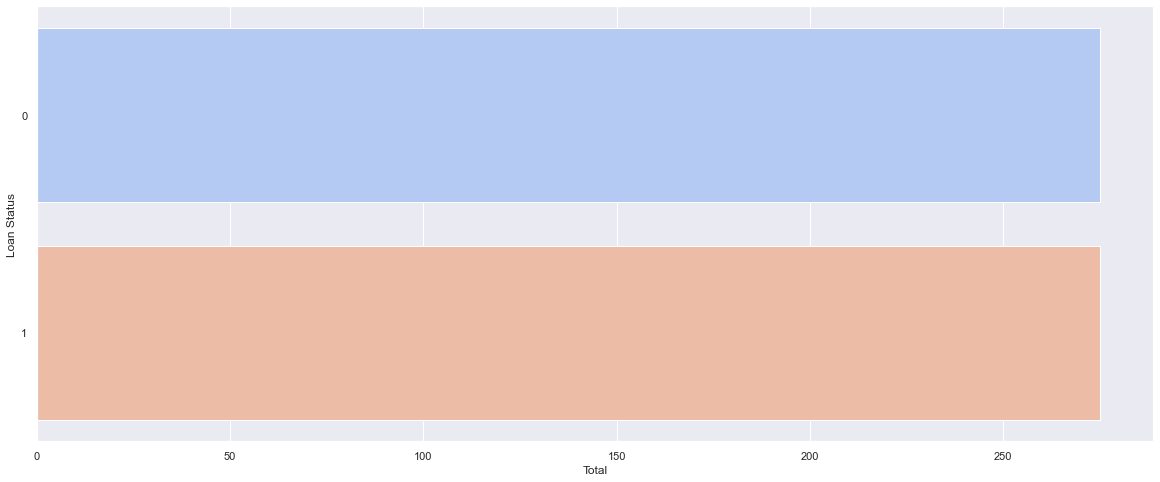

In [123]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=X_train, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

### Data Normalization 

In [124]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [125]:
X_test = min_max_scaler.transform(X_test)

In [126]:
X_train=X
y_train=y

In [127]:
X_train

array([[0.46036775, 0.        , 0.52569521, ..., 0.        , 1.        ,
        0.        ],
       [0.86305262, 0.56702958, 0.79366037, ..., 0.        , 0.        ,
        0.        ],
       [0.43457067, 0.69893547, 0.51795885, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.42534158, 0.57833166, 0.59295718, ..., 0.        , 1.        ,
        0.        ],
       [0.36854426, 0.        , 0.52541003, ..., 0.        , 0.        ,
        0.        ],
       [0.82639052, 0.        , 0.8149372 , ..., 0.        , 0.        ,
        0.        ]])

### Model Building

### Logistic Regression 

              precision    recall  f1-score   support

           0       0.76      0.56      0.65        39
           1       0.83      0.92      0.88        92

    accuracy                           0.82       131
   macro avg       0.80      0.74      0.76       131
weighted avg       0.81      0.82      0.81       131

LR accuracy: 81.68%
LR recall: 92.39%


Text(156.5, 0.5, 'Truth')

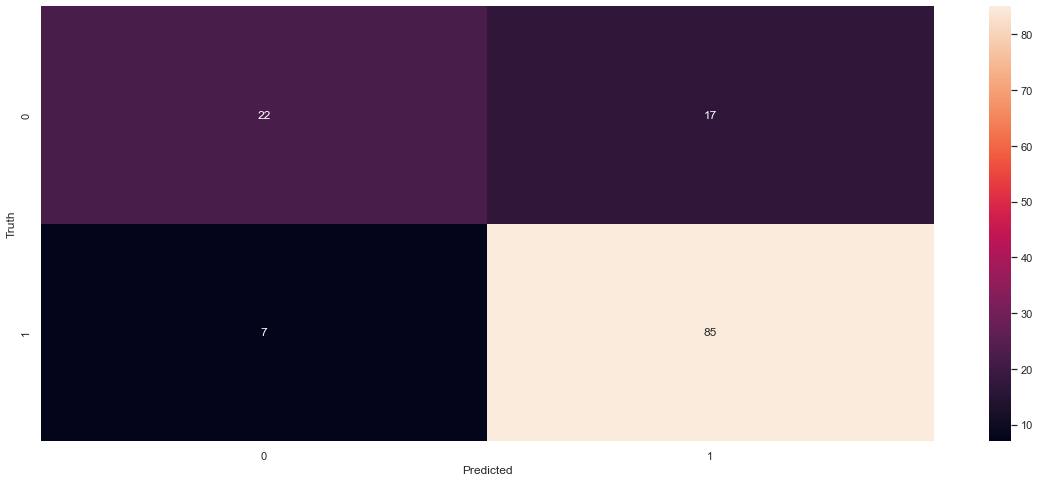

In [128]:
LRclassifier = LogisticRegression(solver='newton-cg', max_iter=300, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

from sklearn.metrics import recall_score
LRRec=recall_score(y_test, y_pred, average='binary')

print('LR accuracy: {:.2f}%'.format(LRAcc*100))
print('LR recall: {:.2f}%'.format(LRRec*100))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


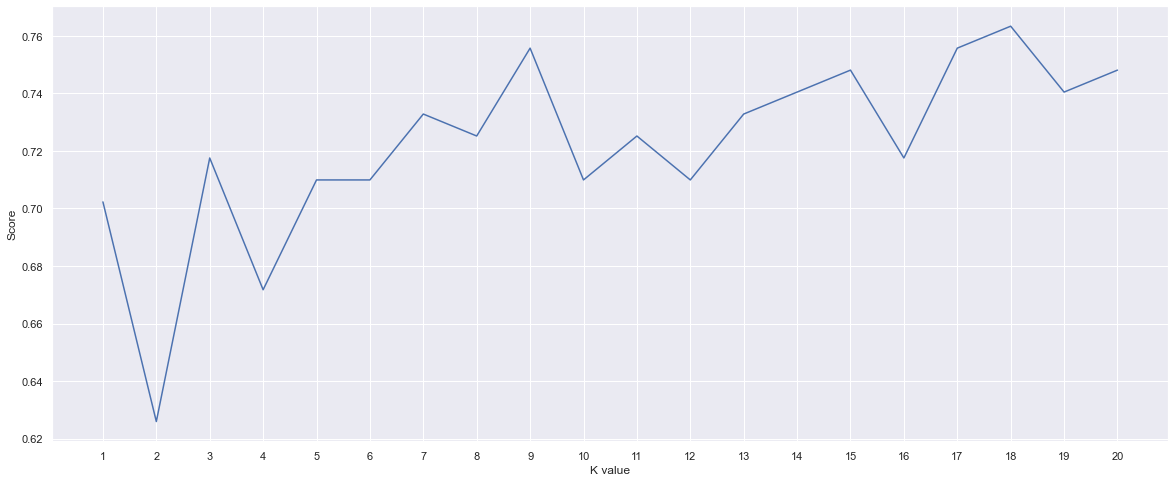

KNN best accuracy: 76.34%


In [129]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [130]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.probability=True
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65        39
           1       0.84      0.90      0.87        92

    accuracy                           0.81       131
   macro avg       0.78      0.75      0.76       131
weighted avg       0.80      0.81      0.80       131

[[23 16]
 [ 9 83]]
SVC accuracy: 80.92%


In [131]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.83      0.51      0.63        39
           1       0.82      0.96      0.88        92

    accuracy                           0.82       131
   macro avg       0.83      0.73      0.76       131
weighted avg       0.83      0.82      0.81       131

[[20 19]
 [ 4 88]]
Categorical Naive Bayes accuracy: 82.44%


In [132]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        39
           1       0.84      0.92      0.88        92

    accuracy                           0.82       131
   macro avg       0.80      0.76      0.77       131
weighted avg       0.82      0.82      0.82       131

[[23 16]
 [ 7 85]]
Gaussian Naive Bayes accuracy: 82.44%


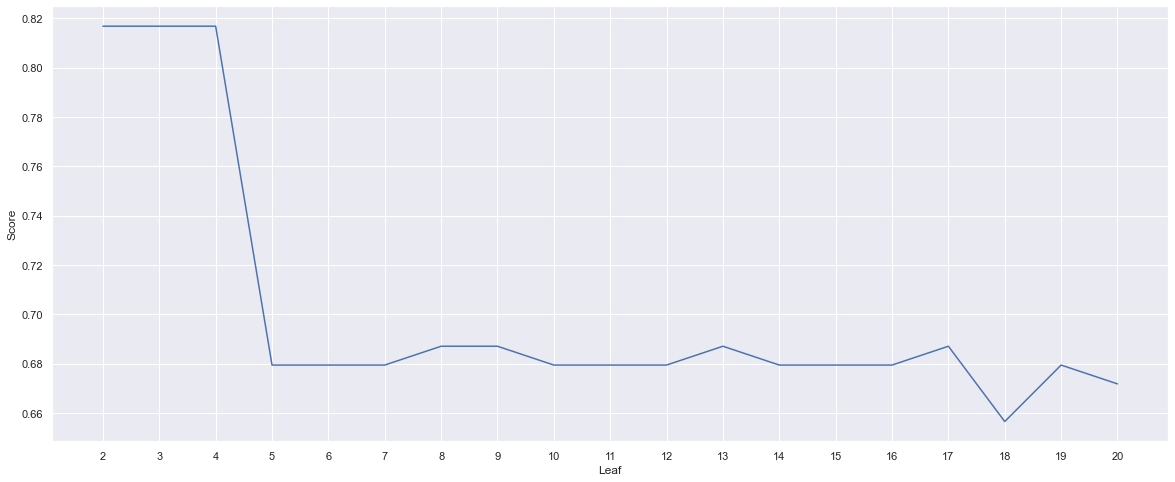

Decision Tree Accuracy: 81.68%


In [133]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [134]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52        39
           1       0.79      0.89      0.84        92

    accuracy                           0.76       131
   macro avg       0.71      0.66      0.68       131
weighted avg       0.74      0.76      0.74       131

[[17 22]
 [10 82]]
Gradient Boosting accuracy: 75.57%


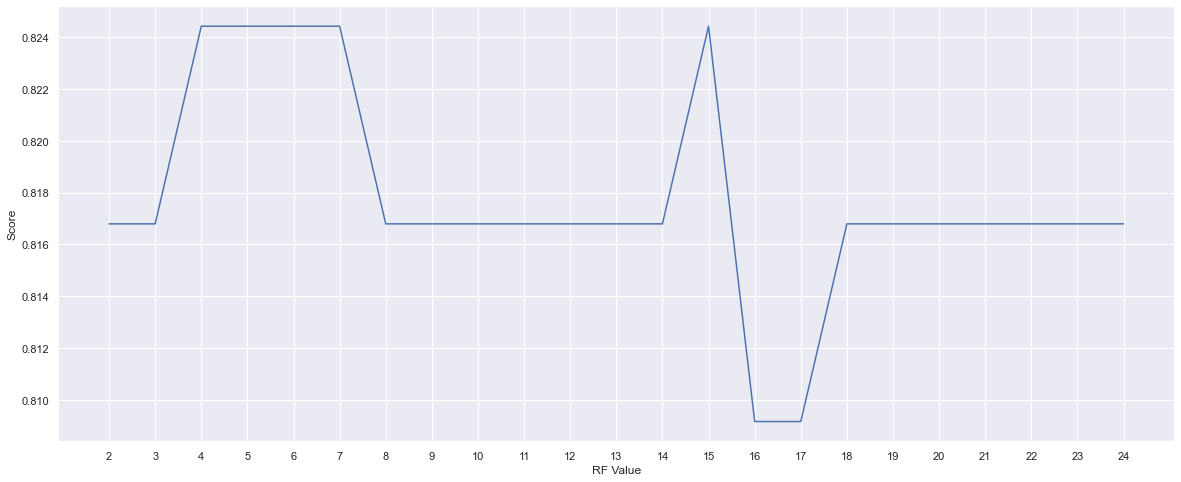

Random Forest Accuracy:  82.44%


In [135]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

### Prediction probabilities

In [136]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = LRclassifier.predict_proba(X_test)
kn_probs = KNclassifier.predict_proba(X_test)

svc_probs = SVCclassifier.predict_proba(X_test)
nb1_probs = NBclassifier1.predict_proba(X_test)
nb2_probs = NBclassifier2.predict_proba(X_test)
dt_probs = DTclassifier.predict_proba(X_test)
gb_probs = GBclassifier.predict_proba(X_test)
rf_probs = RFclassifier.predict_proba(X_test)


In [137]:
lr_probs = lr_probs[:, 1]
kn_probs = kn_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb1_probs = nb1_probs[:, 1]
nb2_probs = nb2_probs[:, 1]
dt_probs = dt_probs[:, 1]
gb_probs = gb_probs[:, 1]
rf_probs = rf_probs[:, 1]

### Computing AUROC and ROC curve values 

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate AUROC

In [139]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb1_auc = roc_auc_score(y_test, nb1_probs)
nb2_auc = roc_auc_score(y_test, nb2_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

### Calculate ROC curve

In [140]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
nb1_fpr, nb1_tpr, _ = roc_curve(y_test, nb1_probs)
nb2_fpr, nb2_tpr, _ = roc_curve(y_test, nb2_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

### Plot the ROC curve

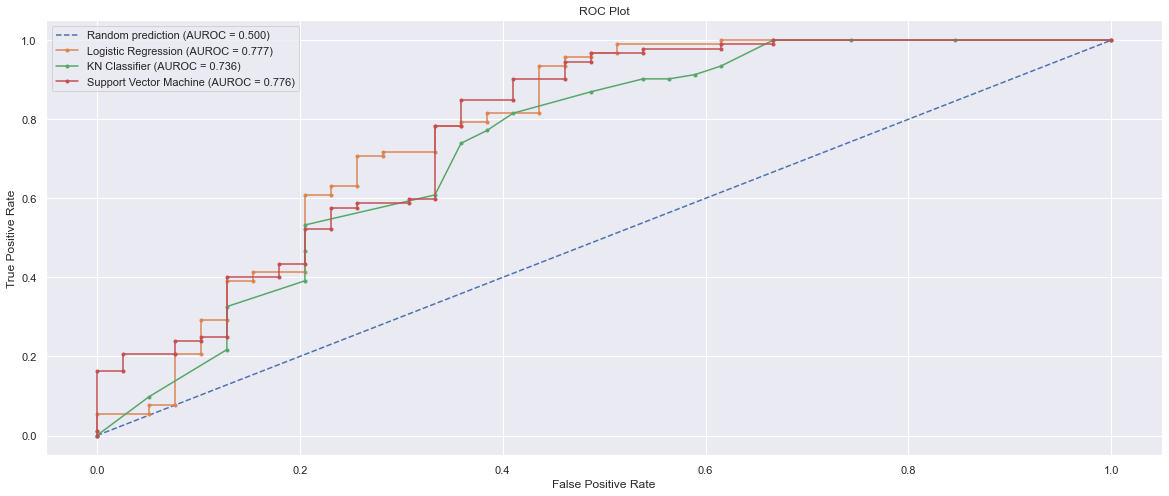

In [141]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(kn_fpr, kn_tpr, marker='.', label='KN Classifier (AUROC = %0.3f)' % kn_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svc_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

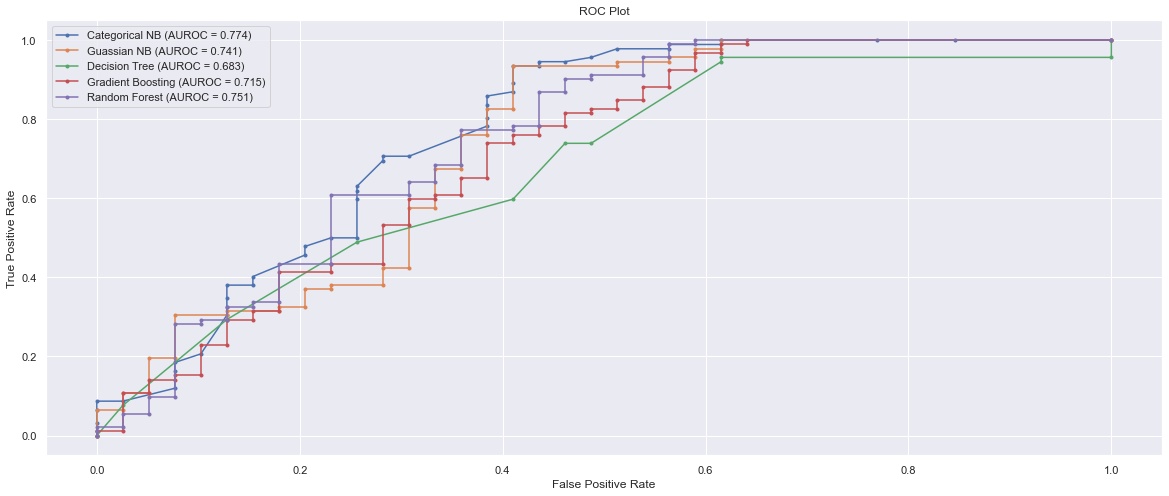

In [142]:
plt.plot(nb1_fpr, nb1_tpr, marker='.', label='Categorical NB (AUROC = %0.3f)' % nb1_auc)
plt.plot(nb2_fpr, nb2_tpr, marker='.', label='Guassian NB (AUROC = %0.3f)' % nb2_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

### Model Comparison

In [143]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Categorical NB,82.442748
4,Gaussian NB,82.442748
6,Random Forest,82.442748
0,Logistic Regression,81.679389
5,Decision Tree,81.679389
2,SVM,80.916031
1,K Neighbors,76.335878
7,Gradient Boost,75.572519


Accuracies are good if we perform data preprocessing first and apply train/test split after preprocessing.